# Word Embedding

the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers.reliable word representation with real-number vector is the goal

# 1.One-hot encoding (CountVectorizing)

The most basic and naive method for transforming words into vectors is to count occurrence of each word in each document
Such an approach is called countvectorizing or one-hot encoding.

In [2]:
#VECTORISERS TO CONVERT WORDS INTO NUMBERSf
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
#vectorizer object created
vectorizer = CountVectorizer()
Corpus = [
          'Text of first document.',
          'Text of the second document made longer.',
          'Number three.',
          'This is number four.'
]
# It will do some indexing to uniqe words in given text
X = vectorizer.fit_transform(Corpus)
X

<4x13 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [5]:
vectorizer.get_feature_names() == (
    ['document', 'first', 'four', 'is', 'longer',
     'made', 'number', 'of', 'second', 'text',
     'the', 'this', 'three'])

True

In [6]:
# retrieving the matrix in the numpy form
X.toarray()

array([[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [7]:
# transforming a new document according to learn vocabulary
vectorizer.transform(['A new document.']).toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

# 2.TF-IDF transforming

weighting by exploitation of useful statistical measure called tf-idf.

IDF =Log[(# Number of documents) / (Number of documents containing the word)]     
TF = (Number of repetitions of word in a document) / (# of words in a document)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Intializing TFIDFVectorizer
vectorizer = TfidfVectorizer()

In [9]:
# learn the vocabulary and store tf-idf sparse matrix in tfidf
tfidf = vectorizer.fit_transform(Corpus)
# Getting feature names of final words that we will use to tag documents
print(vectorizer.get_feature_names())

['document', 'first', 'four', 'is', 'longer', 'made', 'number', 'of', 'second', 'text', 'the', 'this', 'three']


In [10]:
# retrieving matrix in numpy form
tfidf.toarray()

array([[0.46580855, 0.59081908, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.46580855, 0.        , 0.46580855,
        0.        , 0.        , 0.        ],
       [0.32555709, 0.        , 0.        , 0.        , 0.41292788,
        0.41292788, 0.        , 0.32555709, 0.41292788, 0.32555709,
        0.41292788, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.6191303 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.78528828],
       [0.        , 0.        , 0.52547275, 0.52547275, 0.        ,
        0.        , 0.41428875, 0.        , 0.        , 0.        ,
        0.        , 0.52547275, 0.        ]])

# Chunking

group words into hopefully meaningful chunks. One of the main goals of chunking is to group into what are known as "noun phrases." These are phrases of one or more words that contain a noun, maybe some descriptive words, maybe a verb, and maybe something like an adverb. The idea is to group nouns with the words that are in relation to them.

In [11]:
#import package
import nltk
para1 = """Letter of Recommendation (LOR) and Statement of Purpose (SOP) are among the four parameters for selection for GRE/GMAT, the other two being Academic records and Scores in the entrance test. SOP and LOR are also needed by those who wish to do an MBA in India through CAT. Both the documents carry a lot of weightage as far as the admission criteria is concerned.
LOR is to be written by 2 professors (for a candidate who is not employed) and by a professor and employer/superior (in case of working professionals). The persons writing this are to make an assessment of the candidate’s intellectual, academic, professional, leadership and other qualities besides assessing the potential of the candidate to do well in the program he is applying to. """

# Tokenization

In [12]:
#tokens
tokens1 = nltk.word_tokenize(para1)

In [13]:
print(tokens1[:100])

['Letter', 'of', 'Recommendation', '(', 'LOR', ')', 'and', 'Statement', 'of', 'Purpose', '(', 'SOP', ')', 'are', 'among', 'the', 'four', 'parameters', 'for', 'selection', 'for', 'GRE/GMAT', ',', 'the', 'other', 'two', 'being', 'Academic', 'records', 'and', 'Scores', 'in', 'the', 'entrance', 'test', '.', 'SOP', 'and', 'LOR', 'are', 'also', 'needed', 'by', 'those', 'who', 'wish', 'to', 'do', 'an', 'MBA', 'in', 'India', 'through', 'CAT', '.', 'Both', 'the', 'documents', 'carry', 'a', 'lot', 'of', 'weightage', 'as', 'far', 'as', 'the', 'admission', 'criteria', 'is', 'concerned', '.', 'LOR', 'is', 'to', 'be', 'written', 'by', '2', 'professors', '(', 'for', 'a', 'candidate', 'who', 'is', 'not', 'employed', ')', 'and', 'by', 'a', 'professor', 'and', 'employer/superior', '(', 'in', 'case', 'of', 'working']


# POS tagging

In [14]:
#tagging
pos_tagggs1 = nltk.pos_tag(tokens1)

In [15]:
#print taggs
print(pos_tagggs1[:100])

[('Letter', 'NN'), ('of', 'IN'), ('Recommendation', 'NNP'), ('(', '('), ('LOR', 'NNP'), (')', ')'), ('and', 'CC'), ('Statement', 'NNP'), ('of', 'IN'), ('Purpose', 'NNP'), ('(', '('), ('SOP', 'NNP'), (')', ')'), ('are', 'VBP'), ('among', 'IN'), ('the', 'DT'), ('four', 'CD'), ('parameters', 'NNS'), ('for', 'IN'), ('selection', 'NN'), ('for', 'IN'), ('GRE/GMAT', 'NNP'), (',', ','), ('the', 'DT'), ('other', 'JJ'), ('two', 'CD'), ('being', 'VBG'), ('Academic', 'NNP'), ('records', 'NNS'), ('and', 'CC'), ('Scores', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('entrance', 'NN'), ('test', 'NN'), ('.', '.'), ('SOP', 'NNP'), ('and', 'CC'), ('LOR', 'NNP'), ('are', 'VBP'), ('also', 'RB'), ('needed', 'VBN'), ('by', 'IN'), ('those', 'DT'), ('who', 'WP'), ('wish', 'VBP'), ('to', 'TO'), ('do', 'VB'), ('an', 'DT'), ('MBA', 'NNP'), ('in', 'IN'), ('India', 'NNP'), ('through', 'IN'), ('CAT', 'NNP'), ('.', '.'), ('Both', 'CC'), ('the', 'DT'), ('documents', 'NNS'), ('carry', 'VBP'), ('a', 'DT'), ('lot', 'NN'), ('of

# Chunking

In [16]:
#Define Chunk Rule
grammar = "NP: {<DT>?<JJ>*<NN>}"
#Using above defined grammer, created chunk parser
cp = nltk.RegexpParser(grammar)
#apply parser on pos tags
result1 = cp.parse(pos_tagggs1)

In [17]:
print(result1[:10])

[Tree('NP', [('Letter', 'NN')]), ('of', 'IN'), ('Recommendation', 'NNP'), ('(', '('), ('LOR', 'NNP'), (')', ')'), ('and', 'CC'), ('Statement', 'NNP'), ('of', 'IN'), ('Purpose', 'NNP')]


In [18]:
# draw the tree
result1.draw()

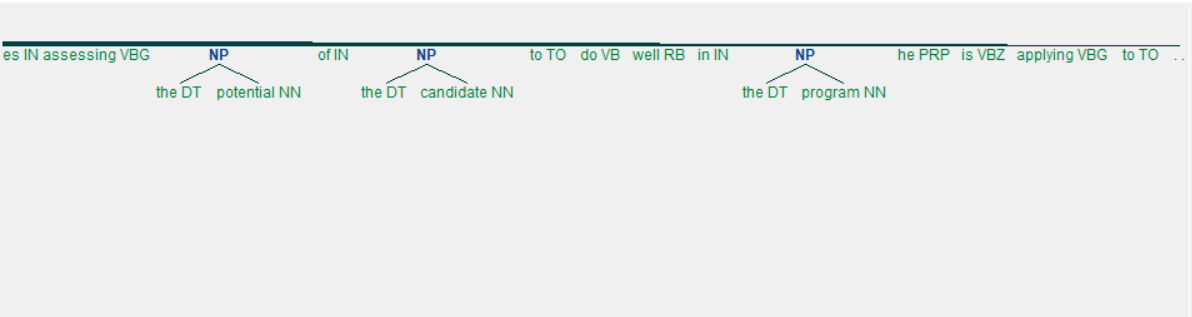